In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [2]:
N = 4096
FOV = 10e-3
dx = FOV/N

E0 = 9500

beam_params = {
    'photonEnergy': E0-1,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 5,
    'scaleFactor': 20,
    'z_source': 630
}

In [15]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286, orientation=2)

alphaAsym = 5*np.pi/180

# slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)
# entrance_slit = optics.Slit('entrance', z=989, x_width=.5e-3, y_width=.5e-3)

crystal1 = optics.Crystal('c1', hkl=[2,2,0], length=1e-2, width=10e-3, z=990, E0=E0,
                          alphaAsym=0, orientation=2,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.012, E0=E0,alphaAsym=alphaAsym, 
                          orientation=0,pol='p')
crystal3 = optics.Crystal('c3', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.112, E0=E0,alphaAsym=-alphaAsym, 
                          orientation=0, asym_type='emergence',pol='p')

IP = optics.PPM('IP', FOV=50e-6, z=991.08, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=4e-3,z=crystal1.z - .05, N=256)

# YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG = optics.PPM('YAG2',FOV=4e-3,z=crystal1.z + .05, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
devices = [mr1l0,mr2l0,upstream_YAG, downstream_YAG, crystal1]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

FWHM in x: 359.78686744097115 microns
FWHM in y: 359.78686744097115 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.418097634308613
5.418097634308613
b 1.00
b 1.64
b 0.61
after mr1l0: 0.00
after mr2l0: 0.00
after c1: -0.69


mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad


<IPython.core.display.Javascript object>


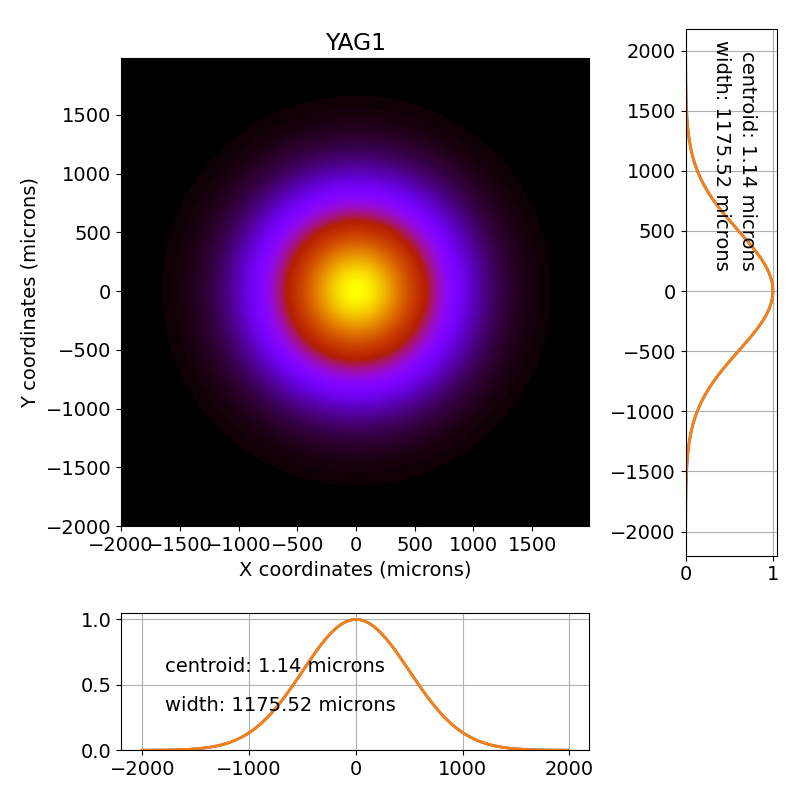

<IPython.core.display.Javascript object>


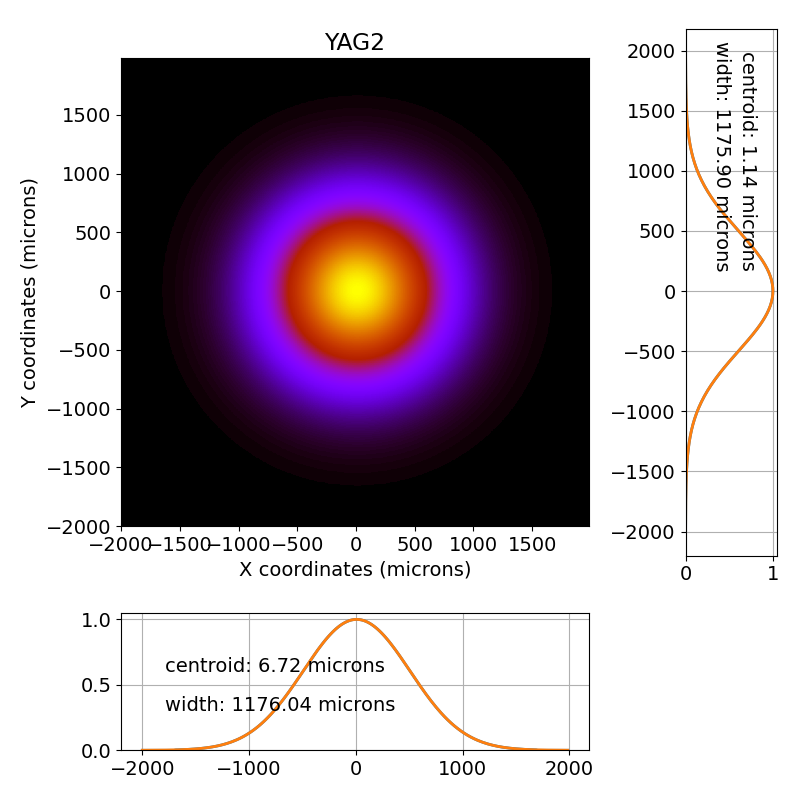

<IPython.core.display.Javascript object>


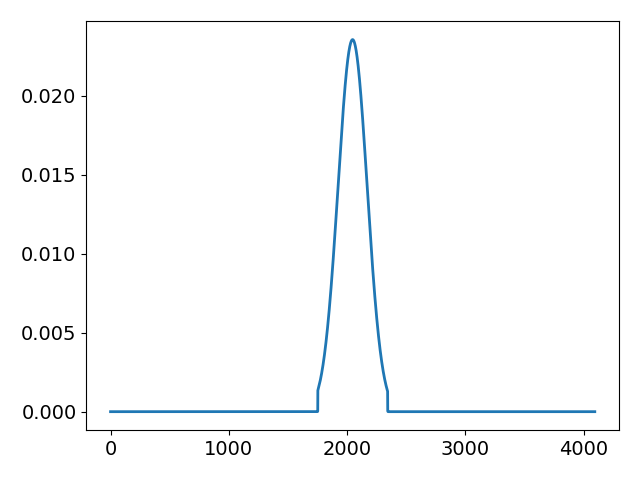

In [18]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
# XPP.IP.view_beam()
XPP.YAG2.view_beam()
# XPP.YAG_mid.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [19]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=1, time_window=100)

In [20]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG1','YAG2'])

FWHM in x: 360.13838686139405 microns
FWHM in y: 360.13838686139405 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.412796393188454
5.412796393188454
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 360.1368090023619 microns
FWHM in y: 360.1368090023619 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.412820165570158
5.412820165570158
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
z

zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 360.1099875217187 microns
FWHM in y: 360.1099875217187 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.413224296059139
5.413224296059139
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 360.1084099124296 microns
FWHM in y: 360.1084099124296 microns
FWHM Divergen

zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 360.0847474377354 microns
FWHM in y: 360.0847474377354 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.413604654166416
5.413604654166416
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 360.08317005039044 microns
FWH

zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 360.06108808382237 microns
FWHM in y: 360.06108808382237 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.413961239891987
5.413961239891987
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 360.05951090450753 microns
FWHM in y: 360.05951090450753 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.413985012273692
5.413985012273692
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 1

zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 360.03427792128645 microns
FWHM in y: 360.03427792128645 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414365370380968
5.414365370380968
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 360.0327009776894 microns
FW

zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 360.0090484873244 microns
FWHM in y: 360.0090484873244 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414745728488244
5.414745728488244
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 360.0074717655311 microns
FWHM in y: 360.0074717655311 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414769500869949
5.414769500869949
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29


zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 359.98224610183706 microns
FWHM in y: 359.98224610183706 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415149858977224
5.415149858977224
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 359.98066961565917 microns
FWHM in y: 359.98066961565917 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415173631

FWHM in x: 359.95702398585945 microns
FWHM in y: 359.95702398585945 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415530217084501
5.415530217084501
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 359.9554477213891 microns
FWHM in y: 359.9554477213891 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415553989466206
5.415553989466206
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
z

zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 359.92865334508406 microns
FWHM in y: 359.92865334508406 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415958119955185
5.415958119955185
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 359.9270773299788 microns
FWHM in y: 359.9270773299788 microns
FWHM Diverg

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 359.90343876552254 microns
FWHM in y: 359.90343876552254 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416338478062463
5.416338478062463
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07


FWHM in x: 359.87980331712424 microns
FWHM in y: 359.87980331712424 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416695063788033
5.416695063788033
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 359.8782277313424 microns
FWHM in y: 359.8782277313424 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416718836169738
5.416718836169738
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
z

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 359.8530202417969 microns
FWHM in y: 359.8530202417969 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.417099194277014
5.417099194277014
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00

zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 359.82624116718694 microns
FWHM in y: 359.82624116718694 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.417503324765996
5.417503324765996
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.0

FWHM in x: 359.80261589362345 microns
FWHM in y: 359.80261589362345 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4178599104915675
5.4178599104915675
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift4
delta z: 0.00
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
YAG2
zx: 360.07
zy: 360.07
azimuth -693.56 mrad
FWHM in x: 359.8010409860927 microns
FWHM in y: 359.8010409860927 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.417883682873271
5.417883682873271
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00

<IPython.core.display.Javascript object>


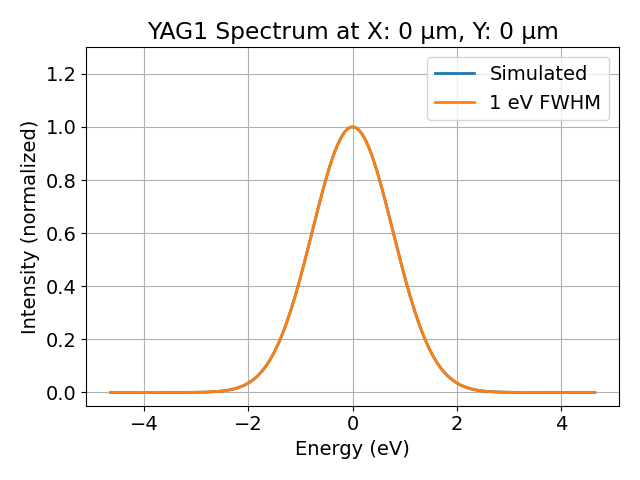

<IPython.core.display.Javascript object>


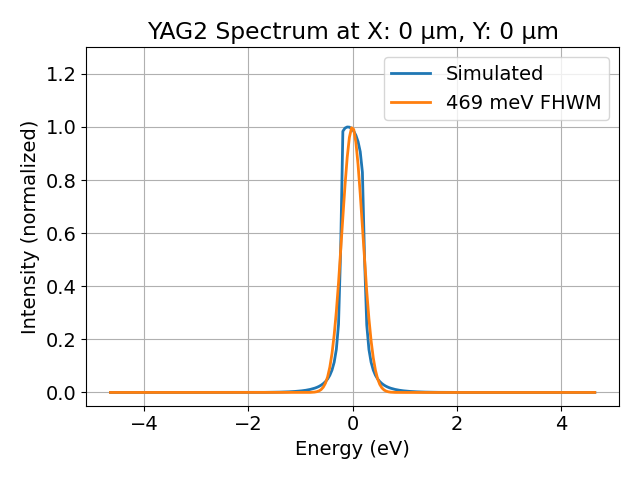

<IPython.core.display.Javascript object>


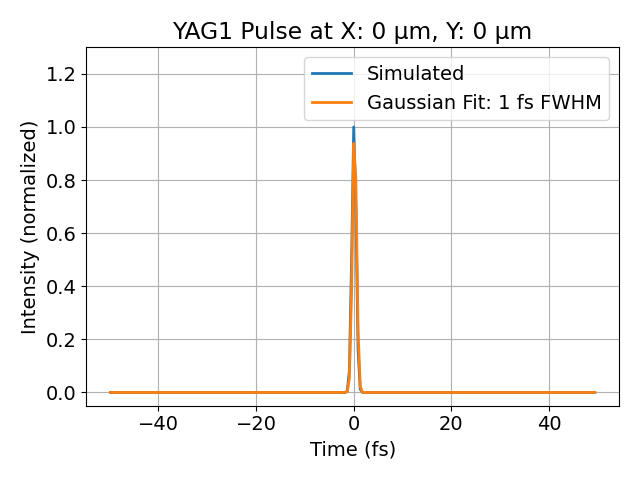

<IPython.core.display.Javascript object>


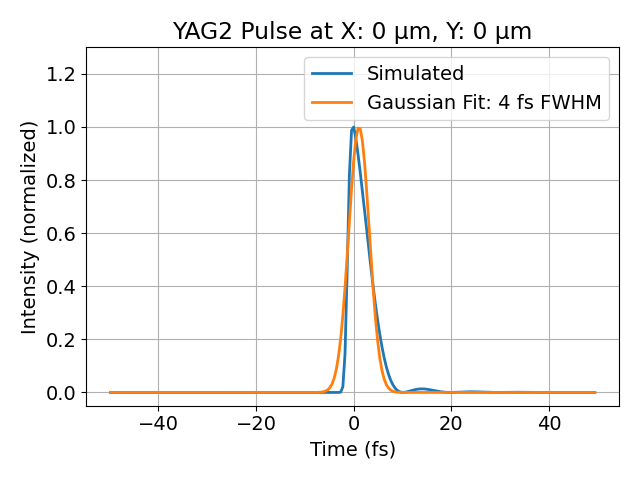

In [21]:
figure_path = '/Users/Matt/OneDrive - SLAC National Accelerator Laboratory/Projects/split_and_delay/figures/'
pulse_test.plot_spectrum('YAG1')
plt.savefig(figure_path+'symmetric_crystal_input_spectrum.png')
pulse_test.plot_spectrum('YAG2')
plt.savefig(figure_path+'symmetric_crystal_output_spectrum.png')
pulse_test.plot_pulse('YAG1', shift=45)
plt.savefig(figure_path+'symmetric_crystal_input_pulse.png')
pulse_test.plot_pulse('YAG2', shift=-42)
plt.savefig(figure_path+'symmetric_crystal_output_pulse.png')

<IPython.core.display.Javascript object>


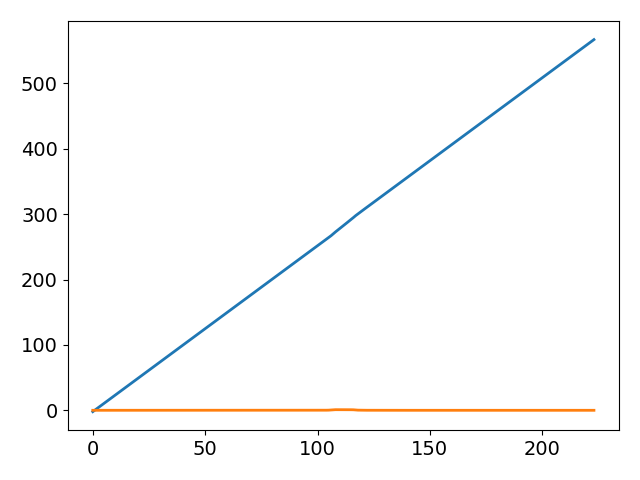

In [31]:
plt.figure()
plt.plot(np.unwrap(np.angle(pulse_test.energy_stacks['YAG2'][128,128,:])))
plt.plot(np.abs(pulse_test.energy_stacks['YAG2'][128,128,:])**2)

<IPython.core.display.Javascript object>


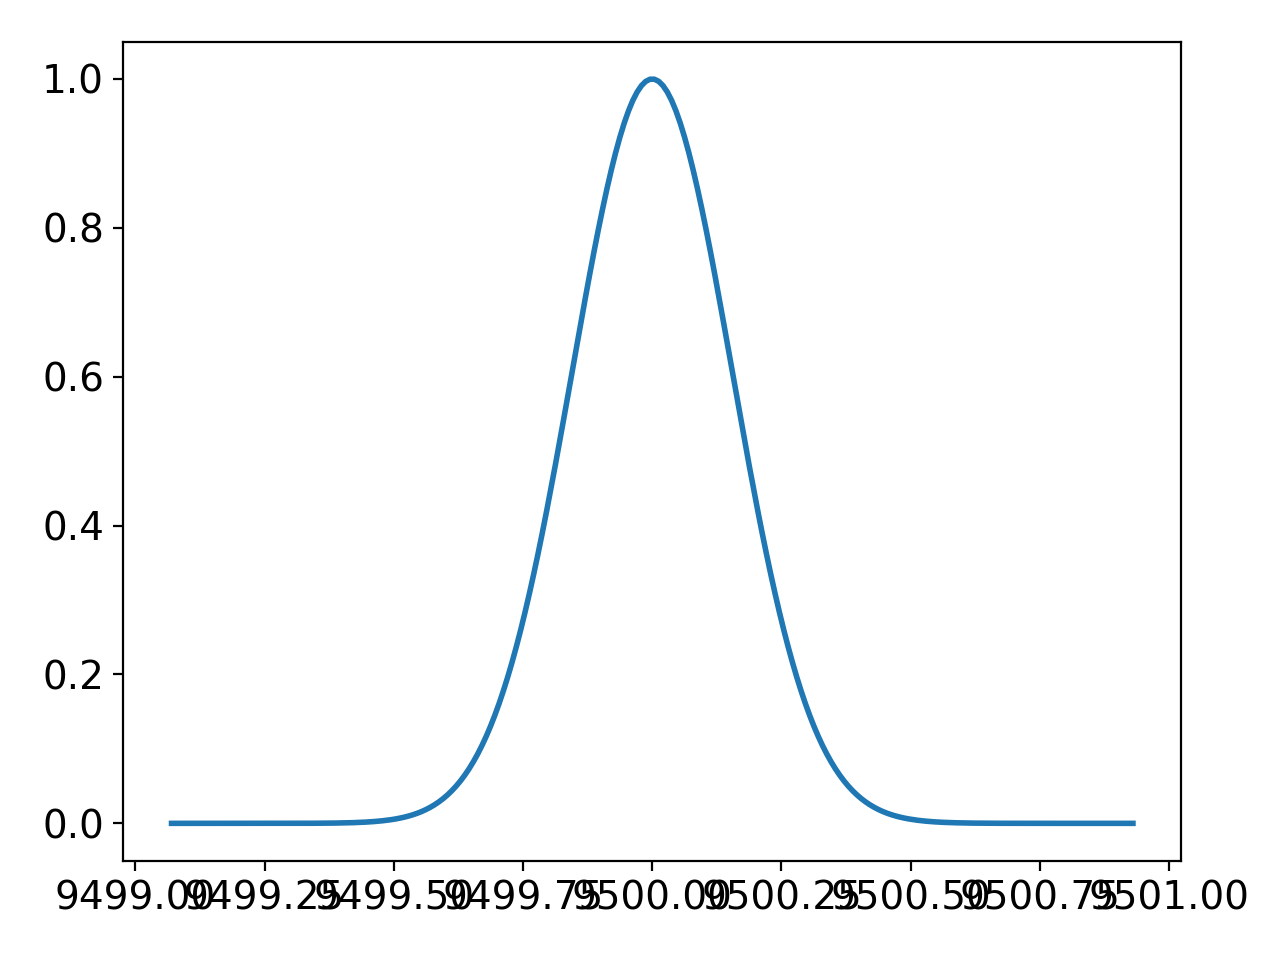

In [68]:
plt.figure()
plt.plot(pulse_test.energy,pulse_test.envelope**2)

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8